## Importing libraries.

In [115]:
# Importing the Neccessary liraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pylab import rcParams

import statsmodels.api as sm
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.preprocessing as scale
from collections import Counter

from scipy import stats
from scipy.stats import kurtosis,skew

In [116]:
#importing Neccessary libraries

%matplotlib inline
rcParams['figure.figsize'] = 9,7
sns.set(style="darkgrid")
base_color = sns.color_palette()[0]

# About the DataSet

> **Context**

> - **The datasets provided include the players data for the Career Mode from FIFA 15 to FIFA 20 ("players_20.csv"). The data allows multiple comparison of the same players across the last 6 version of the videogame.**

>  **Content Variables**

> - Every player available in FIFA 15, 16, 17, 18, 19, and also FIFA 20
> - 100+ attributes
> - URL of the scraped player
> - Player positions, with the role in the club and in the national team
> - Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
> - Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.

# Gathering Data and Some Cleaning and Wrangling.

> **We will now collect all the required datas.**

In [31]:
# Collecting the required data.
fifa_15 = pd.read_csv("players_15.csv")
fifa_16 = pd.read_csv("players_16.csv")
fifa_17 = pd.read_csv("players_17.csv")
fifa_18 = pd.read_csv("players_18.csv")
fifa_19 = pd.read_csv("players_19.csv")
fifa_20 = pd.read_csv("players_20.csv")

In [32]:
# Tagging each file by the Year before concating into a single master file

fifa_15["Year"] = 2015
fifa_16["Year"] = 2016
fifa_17["Year"] = 2017
fifa_18["Year"] = 2018
fifa_19["Year"] = 2019
fifa_20["Year"] = 2020

In [33]:
# Generating a Master file for analysis

frames = (fifa_15, fifa_16, fifa_17, fifa_18, fifa_19, fifa_20)

master_data = pd.concat(frames, axis=0, join='outer', ignore_index=False, keys=None,
              levels=None, names=None, verify_integrity=False, copy=True)

In [34]:
# Changing pandas behavior to display maximum rows and columns
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.options.mode.chained_assignment = None   # Silence SettingWithCopyWarning

In [35]:
# check the data shape
master_data.shape

(100995, 105)

In [36]:
# we will remove the duplicates in the sofifa_id columns
#master_data = master_data.drop_duplicates(["sofifa_id"])

In [37]:
# in my point of view i dont think the sofifa_id','player_url columns are not useful for our analysis
master_data.drop(['sofifa_id','player_url'],axis = 1,inplace = True)

In [38]:
# just make sure the data set is fine
master_data.head()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Year
0,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2015
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2015
2,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,0,0,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,2015
3,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,90,0,0,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,NaN,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,2015
4,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,90,0,0,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,85.0,92.0,86.0,60.0,90.0,"GK Up for Corners, GK Long Throw, 1-on-1 Rush",25,25,25,42,25,25,25,25,41,31,58+8,61+7,43+4,89+3,35,42,78,44+9,83+5,25,29+3,30+8,25,20,37,NaN,25,25,25,87,85+3,92,90

In [39]:
master_data.tail()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Year
18273,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2,2020
18274,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2,2020
18275,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,2020
18276,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,2020
18277,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2,2020


In [40]:
# we will now check the missing values columns in the data
master_data.isnull().sum()[master_data.isnull().sum() != 0]

release_clause_eur      51644
player_tags             92698
team_position            1326
team_jersey_number       1326
loaned_from             94290
joined                   8038
contract_valid_until     1333
nation_position         94470
nation_jersey_number    94470
pace                    11247
shooting                11247
passing                 11247
dribbling               11247
defending               11247
physic                  11247
gk_diving               89748
gk_handling             89748
gk_kicking              89748
gk_reflexes             89748
gk_speed                89748
gk_positioning          89748
player_traits           56198
mentality_composure     30346
ls                      11247
st                      11247
rs                      11247
lw                      11247
lf                      11247
cf                      11247
rf                      11247
rw                      11247
lam                     11247
cam                     11247
ram       

In [41]:
# get the general info of the dataset
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100995 entries, 0 to 18277
Columns: 103 entries, short_name to Year
dtypes: float64(16), int64(11), object(76)
memory usage: 80.1+ MB


In [42]:
# Get the basic statistics from the data
master_data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,Year
count,100995.000000,100995.000000,100995.000000,100995.000000,100995.000000,1.009950e+05,100995.000000,100995.000000,100995.000000,100995.000000,4.935100e+04,99669.000000,99662.000000,6525.000000,89748.000000,89748.000000,89748.000000,89748.000000,89748.00000,89748.000000,11247.000000,11247.000000,11247.000000,11247.000000,11247.000000,11247.000000,100995.000000
mean,25.072122,181.197822,75.353364,65.814308,70.723254,1.890161e+06,9116.688945,1.118986,2.941868,2.317521,4.636133e+06,19.733197,2019.048213,12.062529,68.046430,52.237833,56.872220,61.936233,50.96615,64.949904,65.397884,62.518805,61.161021,66.323998,40.559794,62.854539,2017.615427
std,4.634504,6.697101,6.975713,7.104778,6.321098,4.820973e+06,20897.285342,0.398290,0.658729,0.743787,1.096889e+07,16.402624,2.144912,6.806542,11.184736,13.928667,10.688205,10.587017,16.87465,9.714968,7.881551,8.033031,8.062276,8.384125,10.153156,8.851533,1.699390
min,16.000000,154.000000,49.000000,40.000000,40.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2014.000000,1.000000,21.000000,14.000000,20.000000,22.000000,14.00000,27.000000,35.000000,36.000000,21.000000,31.000000,12.000000,37.000000,2015.000000
25%,21.000000,176.000000,70.000000,61.000000,66.000000,1.400000e+05,1000.000000,1.000000,3.000000,2.000000,5.360000e+05,8.000000,2017.000000,6.000000,62.000000,42.000000,50.000000,56.000000,35.00000,59.000000,60.000000,57.000000,56.000000,60.000000,33.000000,57.000000,2016.000000
50%,25.000000,181.000000,75.000000,66.000000,70.000000,5.250000e+05,2000.000000,1.000000,3.000000,2.000000,1.200000e+06,17.000000,2019.000000,12.000000,69.000000,54.000000,58.000000,63.000000,55.00000,66.000000,65.000000,62.000000,61.000000,66.000000,42.000000,63.000000,2018.000000
75%,28.000000,186.000000,80.000000,70.000000,75.000000,1.300000e+06,8000.000000,1.000000,3.000000,3.000000,3.600000e+06,26.000000,2021.000000,18.000000,76.000000,63.000000,64.000000,69.000000,65.00000,72.000000,71.000000,68.000000,66.000000,72.000000,47.000000,69.000000,2019.000000
max,47.000000,205.000000,110.000000,94.000000,95.000000,1.230000e+08,565000.000000,5.000000,5.000000,5.000000,2.368000e+08,99.000000,2026.000000,87.000000,97.000000,93.000000,93.000000,96.000000,91.00000,92.000000,91.000000,92.000000,95.000000,94.000000,68.000000,91.000000,2020.000000


In [43]:
# i am intrigued to see some abnormal values in the body type column
master_data['body_type'].value_counts()

Normal                 59790
Lean                   34968
Stocky                  6205
Akinfenwa                  5
C. Ronaldo                 5
Shaqiri                    5
Neymar                     5
Courtois                   5
Messi                      5
PLAYER_BODY_TYPE_25        2
Name: body_type, dtype: int64

In [44]:
# we will now transform the data and remove those abnormal values

master_data["body_type"] = master_data["body_type"].replace(["Neymar", "C. Ronaldo", "Messi","Courtois","PLAYER_BODY_TYPE_25"], "Lean")
master_data["body_type"] = master_data["body_type"].replace(["Shaqiri", "Akinfenwa"], "Stocky")

In [45]:
# we will now check afer transforming
master_data['body_type'].value_counts()

Normal    59790
Lean      34990
Stocky     6215
Name: body_type, dtype: int64

In [46]:
def columns_with_null(df):
    '''
    Function to find columns with missing values
    
    Args:
        df: a Dataframe
        
    Returns:
        Dataframe: a dataframe with column names, number of missing values, and percentage of missing values
    '''
    
    cols = df.columns[df.isnull().sum() > 0]
    df_null = pd.DataFrame(df[cols].isnull().sum().sort_values(), columns=['# of Nulls'])
    df_null['Null %'] = df[cols].isnull().mean().sort_values()
    
    
    return df_null

# Making a Copy of master data.

In [47]:
# we will make a copy of the data.

new_df = master_data.copy()

In [48]:
#check the head of the new data
new_df.head()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Year
0,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2015
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2015
2,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,0,0,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,2015
3,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,90,0,0,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,NaN,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,2015
4,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,90,0,0,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,85.0,92.0,86.0,60.0,90.0,"GK Up for Corners, GK Long Throw, 1-on-1 Rush",25,25,25,42,25,25,25,25,41,31,58+8,61+7,43+4,89+3,35,42,78,44+9,83+5,25,29+3,30+8,25,20,37,NaN,25,25,25,87,85+3,92,90

# Basic Visualizations.

# Lets perform some basic analysis on the players in FIFA for the year 2020.

### lets get the Essence of the dataset

In [49]:
# create a new dataset wiht palyers data from the year 2020
df_20 = new_df.query("Year == 2020")
df_20.shape

(18278, 103)

In [50]:
# we will check the columns.
columns = df_20.columns.to_numpy()
columns

array(['short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg',
       'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves',
       'work_rate', 'body_type', 'real_face', 'release_clause_eur',
       'player_tags', 'team_position', 'team_jersey_number',
       'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'move

In [51]:
# Quick hack for creating distplot. 

def distplot_fifa(x,**kwargs):
    """ Quick hack for creating distplot. """
    palette = kwargs.pop('color')
    plt.figure(figsize = [5, 5])
    sns.kdeplot(x, shade=True)
    plt.ylabel("Count")
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()

In [52]:
# Quick hack for creating histplot. 

def histplot_fifa(x,**kwargs):
    """ Quick hack for creating histplot. """
    palette = kwargs.pop('color')
    plt.figure(figsize = [5, 5])
    plt.hist(x)
    plt.xlabel("")
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()

In [53]:
# Quick hack for creating histplot. 

def boxen_plot(data, x_data, y_data):
    """ Quick hack for creating boxenplot. """
    plt.figure(figsize=(12,8))
    sns.boxenplot(data[x_data], data[y_data])
    plt.xlabel("")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(rotation = 90)
    plt.show()

In [54]:
# Quick hack for creating violinplot. 

def violin_plot(data, x_data, y_data):
    """ Quick hack for creating boxenplot. """
    plt.figure(figsize=(8,8))
    sns.violinplot(data[x_data], data[y_data])
    plt.xlabel("")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(rotation = 45)
    plt.show()

In [55]:
# Quick hack for creating boxplot. 

def box_plot(data, x_data, y_data):
    """ Quick hack for creating boxenplot. """
    plt.figure(figsize=(8,8))
    sns.boxplot(data[x_data], data[y_data],linewidth=3.0)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.xticks(rotation = 90)
    plt.show()

# What is the average height and Weight of the Players

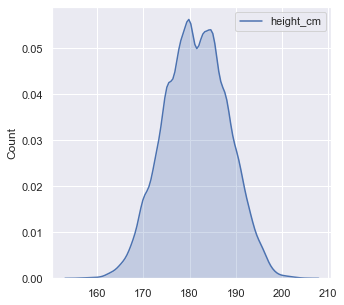

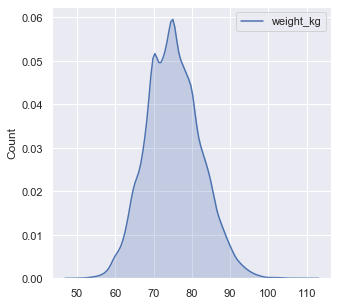

In [56]:
#plotting the distplot
distplot_fifa(df_20['height_cm'],color = base_color)
distplot_fifa(df_20['weight_kg'],color = base_color)

# Insights

> **We can see that the height of the  players is between 165 - 195 cms**

> **We can see that the height of the  players is between 60 - 90 kgs cms**

# What is the average age and ratings of the Players

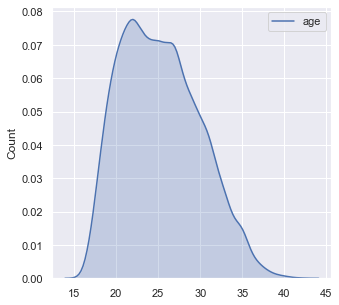

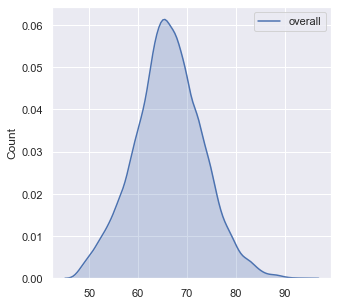

In [57]:
distplot_fifa(df_20['age'],color = base_color);
distplot_fifa(df_20['overall'],color = base_color);

# What is the most preferred foot for the players

In [58]:
n_points = new_df.shape[0]
max_count = new_df['preferred_foot'].value_counts().max()
max_prop = max_count / n_points

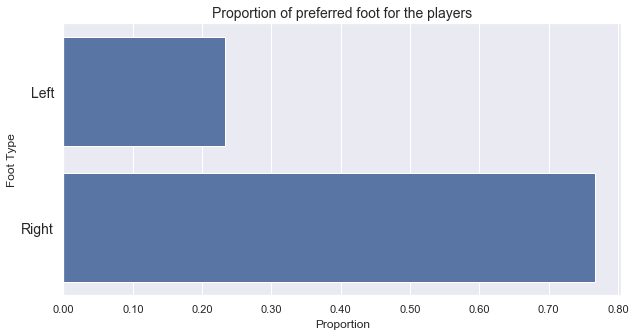

In [59]:
# generate tick mark locations and names
tick_props = np.arange(0, max_prop+0.1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,5))
sns.countplot(data = new_df, y = 'preferred_foot', color = base_color)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('Proportion')
plt.ylabel('Foot Type')
plt.title('Proportion of preferred foot for the players',fontsize = 14)
plt.yticks(fontsize = 14);

# Insight.


> **It is clearly seen that the most preffered foot for the players is Right with almost 76% players are right footed players.**

# Wrangling for further analysis.

In [60]:
#looking into the categorical values for further analysis
cat_df = df_20.select_dtypes(include=['object'])

In [61]:
cat_df.head()

,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Lean,Yes,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,NaN,2004-07-01,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Juventus,"ST, LW",Right,High/Low,Lean,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,NaN,2018-07-10,LS,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Lean,Yes,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,NaN,2017-08-03,LW,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Jan Oblak,1993-01-07,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,Normal,Yes,NaN,GK,NaN,2014-07-16,GK,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,Eden Hazard,1991-01-07,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,Yes,"#Speedster, #Dribbler, #Acrobat",LW,NaN,2019-07-01,LF,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [62]:
def transform_data(df,cols):
    """
    Transforms date and price columns of the dataframe to float and 
    datetime objects.
    
    Arguments:
    ==========
    :param df: pandas dataframe to be used
    :cols : string column of the dataframe
    
    :return: transformed dataframe
    """
    
    if cols:
        
        df[cols] = pd.to_numeric(df[cols], errors='coerce')
        
    return df 



In [63]:
# Transform the data.
transform_data(df_20,'attacking_heading_accuracy')
transform_data(df_20,'power_jumping')
transform_data(df_20,'power_strength')

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Year
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Lean,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,2020
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,Lean,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,2020
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Lean,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,2020
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3

In [64]:
# Checking some Correlation parameters

corr_set_ability = df_20[["overall","age", "pace",'height_cm','weight_kg','potential',
                  'attacking_heading_accuracy','power_jumping','power_strength','defending_standing_tackle']]

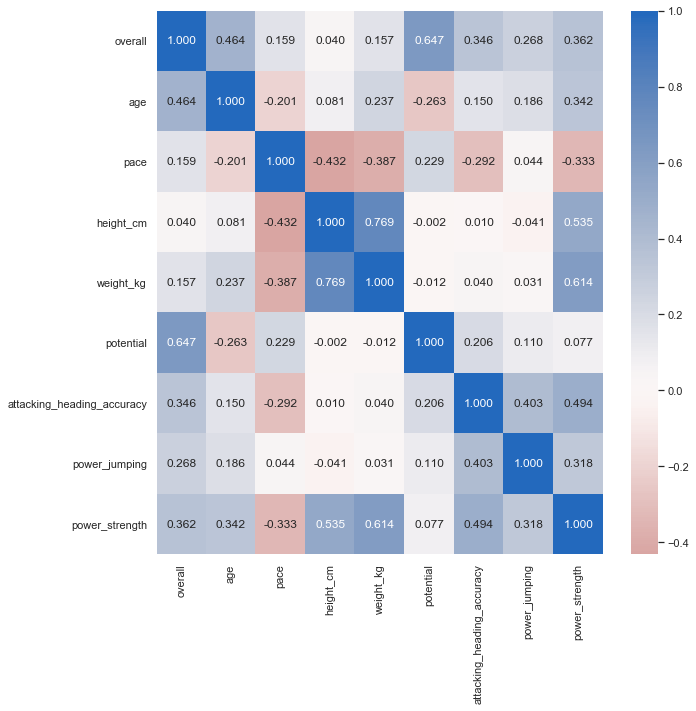

In [65]:
# plot the correlation heat map using seaborn

plt.figure(figsize = [10, 10])
sns.heatmap(corr_set_ability.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

In [66]:
#Transform data
transform_data(df_20,'defending_standing_tackle')

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Year
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Lean,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,2020
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,Lean,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,2020
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Lean,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,2020
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3

# Which nation is having most players from

In [67]:
# Selecting the nationality paamaters
nationality = df_20['nationality'].value_counts()[:10]

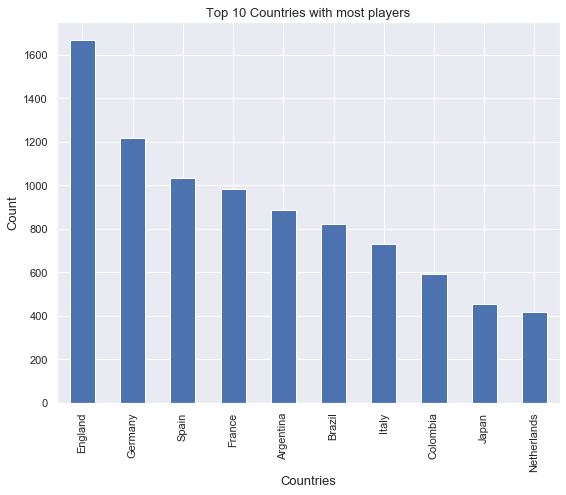

In [68]:
#Plot the bar Chart

nationality.plot(kind = 'bar')
plt.xlabel('Countries',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
plt.title('Top 10 Countries with most players',fontsize = 13);

# Insight

> **Most Players Are from the country England. Followed by Germany and Spain.**

# Being Said that England has Most players What about the English Top Flight teams. Which team Field Most English players in their teams.?

In [69]:
# we Will Query English players from the dataset
english_players = df_20.query("nationality == 'England'")

In [70]:
# We will check the head part
english_players.head()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Year
12,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,89,91,83000000,220000,ST,Right,3,4,3,High/High,Normal,Yes,159800000.0,"#Engine, #Distance Shooter, #Clinical Finisher",ST,10.0,NaN,2010-07-01,2024.0,ST,9.0,70.0,91.0,79.0,81.0,47.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Avoids Using Weaker Foot, Argues ...",75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,86+3,86+3,86+3,82+3,84+3,84+3,84+3,82+3,83+3,83+3,83+3,82+3,79+3,79+3,79+3,82+3,65+3,66+3,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3,2020
26,R. Sterling,Raheem Sterling,24,1994-12-08,170,69,England,Manchester City,88,90,73000000,255000,"RW, LW",Right,3,3,4,High/Medium,Lean,Yes,140500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2015-07-14,2023.0,LW,10.0,93.0,79.0,78.0,89.0,45.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Early Crosser",78,83,38,84,67,89,75,63,69,88,96,91,94,89,94,76,57,79,54,77,38,30,91,79,69,79,47,53,47,15,12,12,15,9,79+3,79+3,79+3,86+3,85+3,85+3,85+3,86+3,85+3,85+3,85+3,85+3,78+3,78+3,78+3,85+3,68+3,62+3,62+3,62+3,68+3,64+3,51+3,51+3,51+3,64+3,2020
108,J. Sancho,Jadon Sancho,19,2000-03-25,180,76,England,Borussia Dortmund,84,92,44500000,61000,"RM, LM",Right,2,4,5,Medium/Low,Lean,Yes,82300000.0,"#Dribbler, #Acrobat",RM,7.0,NaN,2017-08-31,2022.0,RW,21.0,88.0,72.0,77.0,90.0,36.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Speed Dribbler (CP...",78,78,37,83,80,92,81,48,59,88,89,87,91,84,90,68,51,77,59,62,43,29,78,83,57,80,32,45,34,7,11,10,11,13,75+2,75+2,75+2,83+2,81+2,81+2,81+2,83+2,82+2,82+2,82+2,83+2,75+2,75+2,75+2,83+2,64+2,58+2,58+2,58+2,64+2,59+2,47+2,47+2,47+2,59+2,2020
113,D. Alli,Bamidele Alli,23,1996-04-11,188,80,England,Tottenham Hotspur,84,89,41500000,115000,"CAM, CM",Right,3,3,4,High/High,Lean,Yes,79900000.0,#Engine,CAM,20.0,NaN,2015-02-02,2024.0,LCM,20.0,72.0,81.0,79.0,82.0,71.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Crowd Favourite",68,82,83,84,79,83,75,68,80,86,68,76,75,86,62,78,71,89,72,80,84,74,88,83,74,87,70,70,63,7,6,9,11,8,81+3,81+3,81+3,80+3,82+3,82+3,82+3,80+3,82+3,82+3,82+3,81+3,82+3,82+3,82+3,81+3,76+3,78+3,78+3,78+3,76+3,75+3,74+3,74+3,74+3,75+3,2020
148,K. Walker,Kyle Walker,29,1990-05-28,183,70,England,Manchester City,84,84,25500000,165000,RB,Right,3,2,2,High/High,Normal,Yes,47200000.0,"#Speedster, #Engine",RB,2.0,NaN,2017-07-14,2024.0,RB,2.0,91.0,63.0,76.0,77.0,81.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,"Inflexible, Early Crosser",81,51,74,78,57,79,76,71,75,78,87,94,66,83,70,86,83,89,77,69,78,81,68,69,63,75,78,84,83,12,6,16,15,8,73+3,73+3,73+3,75+3,74+3,74+3,74+3,75+3,74+3,74+3,74+3,77+3,76+3,76+3,76+3,77+3,82+3,79+3,79+3,79+3,82+3,82+3,80+3,80+3,80+3,82+3,2020


In [71]:
# we will create a funtion to loop the teams we wish

def eng_players_club(eng_teams):
    
    """
    creating a funtion to loop the teams we wish
    
    Arguments:
    ==========
    :eng_teams - give the selection of teams in english league
    
    :return: dataset with players from the teams we wish  """
        
    eng_players_in_df = pd.DataFrame([])
        
    for clubs in eng_teams:
                eng_py = english_players[(english_players["club"]== clubs)]
                eng_py = eng_py.sort_values("overall", ascending=False)
                frames_english = [eng_players_in_df,eng_py]
                eng_players_in_df = pd.concat(frames_english, axis=0, join='outer', ignore_index=False, keys=None,
                                            levels=None, names=None, verify_integrity=False, copy=True)
                eng_players_in_df =   eng_players_in_df.reset_index(drop=True)
        
    return  eng_players_in_df

In [72]:
# Passing the Arguements
eng_teams = ["Liverpool", "Chelsea", "Arsenal", "Manchester City", "Manchester United", "Tottenham Hotspur"]
count_english = eng_players_club(eng_teams)

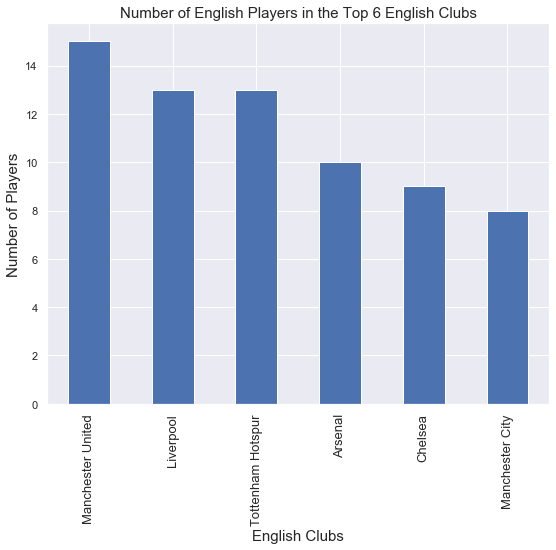

In [73]:
# plot the bar chart.

count_english['club'].value_counts().plot(kind = 'bar')
plt.xlabel('English Clubs',fontsize = 15)
plt.ylabel('Number of Players',fontsize = 15)
plt.title('Number of English Players in the Top 6 English Clubs',fontsize = 15)
plt.xticks(fontsize = 13);

# Which Country now has the Most Exciting Talents.

In [74]:
#Querying the Data and creating a new dataframe
promising_talents = df_20.loc[(df_20['potential']>79) & (df_20['age']<21)]

tempdf_nation = promising_talents['nationality'].value_counts()
tempdf_nation = pd.DataFrame(tempdf_nation)

tempdf_nation = tempdf_nation.reset_index()
tempdf_nation.columns = ['Nationality', 'Players']
tempdf_nation =tempdf_nation.head(10)

tempdf_nation = tempdf_nation.set_index('Nationality')


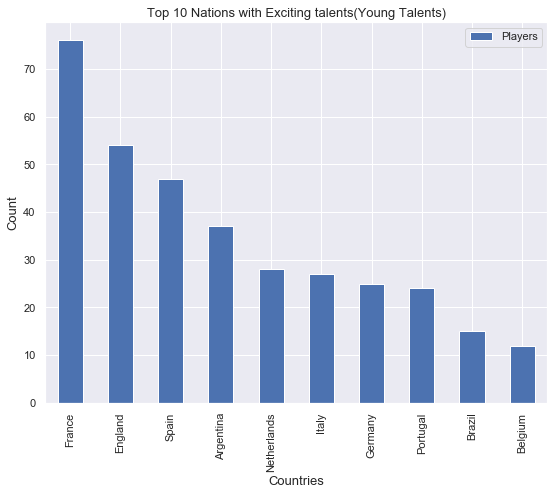

In [75]:
# Plot the Bar Chart
tempdf_nation.plot(kind='bar')

plt.title('Top 10 Nations with Exciting talents(Young Talents)',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
plt.xlabel('Countries',fontsize = 13)

plt.show() # need this line to show the updates made to the figure

# Which clubs has the Most Exciting Talents.

In [76]:
#Querying the Data and creating a new dataframe
promising_talents = df_20.loc[(df_20['potential']>79) & (df_20['age']<21)]

tempdf_clubss = promising_talents['club'].value_counts()
tempdf_clubss = pd.DataFrame(tempdf_clubss)

tempdf_clubss = tempdf_clubss.reset_index()
tempdf_clubss.columns = ['Clubs', 'Players']
tempdf_clubss =tempdf_clubss.head(10)
tempdf_clubss = tempdf_clubss.set_index('Clubs')

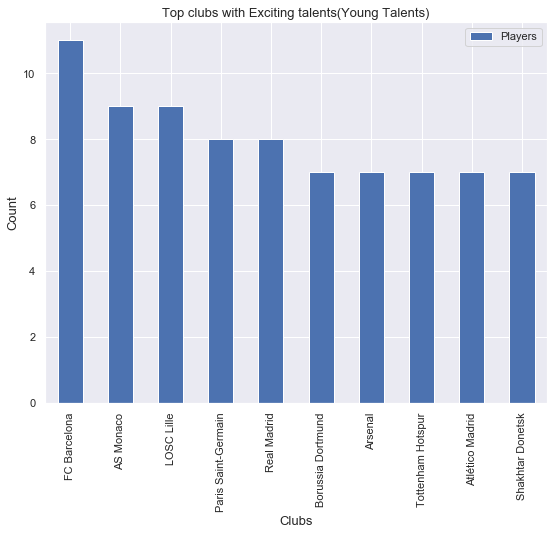

In [77]:
#plot the bar chart
tempdf_clubss.plot(kind='bar')

plt.title('Top clubs with Exciting talents(Young Talents)',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
plt.xlabel('Clubs',fontsize = 13)

plt.show() # need this line to show the updates made to the figure

# Insights.

> **As per the analysis it is clear that France and FC Barcelona is hosting most talented players in their team.**

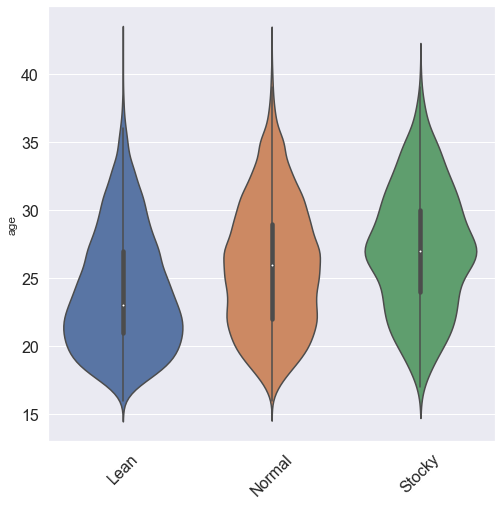

In [78]:
violin_plot(df_20, 'body_type', 'age')

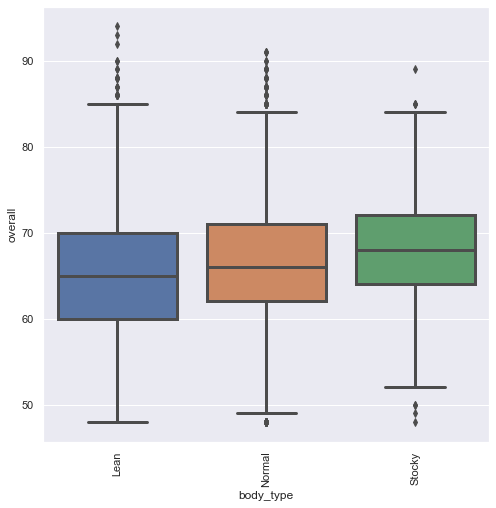

In [79]:
box_plot(df_20, 'body_type', 'overall')

# Deeper Analysis.

# Performance Analysis of EUROPE Top Clubs (An Overview)

In [80]:
# Just having a look into the dataframe
new_df.head()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Year
0,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2015
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2015
2,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,0,0,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,2015
3,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,90,0,0,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,NaN,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,2015
4,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,90,0,0,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,85.0,92.0,86.0,60.0,90.0,"GK Up for Corners, GK Long Throw, 1-on-1 Rush",25,25,25,42,25,25,25,25,41,31,58+8,61+7,43+4,89+3,35,42,78,44+9,83+5,25,29+3,30+8,25,20,37,NaN,25,25,25,87,85+3,92,90

In [81]:
# We will Create Class and Define Functions to perfrom Certain Tasks.

class Club_compare:
    
    def __init__(self, teams, Year):
        
        self.teams = teams
        self.year = Year
        
        
    def all_best_15(self):
        
        '''
        creating a function to group top 15 players from the teams we wish.
        
        input:
        :teams - teams we wish to analyze.
        :Year - Years we wish to perform the Analysis.
        
        return:
        :will return a dataframe with top 15 players with the teams we have passed as arguements.
        
        ''' 
        all_club_best_players = pd.DataFrame([])
        
        for team in self.teams:
            for year in self.year:
                best_players = new_df[(new_df["club"]==team) & (new_df["Year"]==year)]
                best_players = best_players.sort_values("overall", ascending=False)
                best_players = best_players[:15]
                frames = [all_club_best_players,best_players]
                all_club_best_players = pd.concat(frames, axis=0, join='outer', ignore_index=False, keys=None,
                                                  levels=None, names=None, verify_integrity=False, copy=True)
                all_club_best_players =  all_club_best_players.reset_index(drop=True)
        
        return all_club_best_players

   
    def team_overall_stats(self):
        
        '''
        
        Create a Function to loop some columns for the teams we have passed as arguements.
        
        input:
        :teams - pass the teams we wish to analyze
        :Year - pass the Years we wish to perfrom analysis.
        
        return:
        :will return a dataframe with specific columns with the teams we have passed as arguements.
        
        '''
        
        team_overall_stats = pd.DataFrame([])
        top_15_stats = Club_compare.all_best_15(self)
        
        for team in self.teams:
            for year in self.year:
                team_by_year = top_15_stats[(top_15_stats["club"]==team) & (top_15_stats["Year"]==year)]
                
                if self.year == 2015:
                    
                    wg_euro12 = 0
                
                else:
                    wg_euro12 = int(round(team_by_year[["wage_eur"]].mean()))
                    overall = int(round(team_by_year[["overall"]].mean()))
                    potential = int(round(team_by_year[["potential"]].mean()))
                    age = int(round(team_by_year[["age"]].mean()))
                    passing = int(round(team_by_year[["passing"]].mean()))
                    defending = int(round(team_by_year[["defending"]].mean()))
                    attacking = int(round(team_by_year[["shooting"]].mean()))
                    pace = int(round(team_by_year[["pace"]].mean()))
                    average_list = pd.DataFrame(np.array([[team,overall,potential,age,passing,defending,attacking,
                                                   pace,wg_euro12,year]]), 
                                                    columns=("club", "overall","potential","age_avg","passing","defending",
                                                             "attacking","pace","wages_euro","Year"))
                
                    frames = (average_list, team_overall_stats)
                    team_overall_stats = pd.concat(frames, axis=0, join='outer', ignore_index=False, keys=None,
                                                      levels=None, names=None, verify_integrity=False, copy=True)

                    team_overall_stats = team_overall_stats.sort_values("Year")
                    team_overall_stats = team_overall_stats.reset_index(drop=True)
        
        return team_overall_stats

    

In [82]:
# Arguements to be passed and class has been intialized
teams = ["Liverpool", "Chelsea", "Arsenal", "Manchester City", "Manchester United", "Tottenham Hotspur",
         'Real Madrid','FC Barcelona','FC Bayern München','Juventus','Inter','Paris Saint-Germain']
years = [2015, 2016, 2017, 2018, 2019, 2020]
main_class = Club_compare(teams, years)

In [83]:
# Return the datafram from the Function.
players_15 = main_class.all_best_15()

In [84]:
# Return the datafram from the Function.
stats_eur = main_class.team_overall_stats()

In [85]:
# Cross Checking the Datatypes.
stats_eur.dtypes

club          object
overall       object
potential     object
age_avg       object
passing       object
defending     object
attacking     object
pace          object
wages_euro    object
Year          object
dtype: object

In [86]:
# Selecting the required data for analysis.

epl_giants = stats_eur[(stats_eur.club == 'Manchester City') | (stats_eur.club == 'Liverpool')]
la_liga_giants = stats_eur[(stats_eur.club == 'Real Madrid') | (stats_eur.club == 'FC Barcelona')]
serie_a_giants = stats_eur[(stats_eur.club == 'Inter') | (stats_eur.club == 'Juventus')]
ligue_1 = stats_eur[(stats_eur.club == 'Paris Saint-Germain')]
bundesliga = stats_eur[(stats_eur.club == 'FC Bayern München')] 

In [87]:
# Convertin the datatypes for Visualizations.
stats_eur['overall'] = stats_eur['overall'].astype("int")
stats_eur['potential'] = stats_eur['potential'].astype("int")
stats_eur['passing'] = stats_eur['passing'].astype("int")
stats_eur['defending'] = stats_eur['defending'].astype("int")
stats_eur['attacking'] = stats_eur['attacking'].astype("int")
stats_eur['pace'] = stats_eur['pace'].astype("int")
stats_eur['wages_euro'] = stats_eur['wages_euro'].astype("int")
stats_eur['age_avg'] = stats_eur['age_avg'].astype("int")

In [88]:
# Cross Checking the data.
stats_eur.dtypes

club          object
overall        int64
potential      int64
age_avg        int64
passing        int64
defending      int64
attacking      int64
pace           int64
wages_euro     int64
Year          object
dtype: object

# how does the Clubs perform regarding Wages.

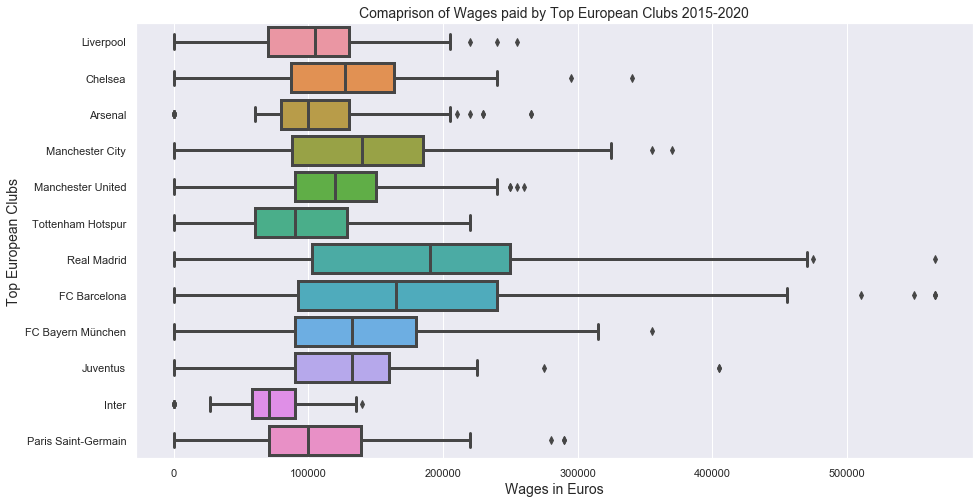

In [89]:
# Plot the Box Plot.
plt.figure(figsize=(15,8))
base_color = sns.color_palette()[0]
sns.boxplot(data = players_15, x = 'wage_eur', y = 'club',linewidth=3.0)
plt.xticks(rotation = 0)
plt.xlabel('Wages in Euros',fontsize = 14)
plt.ylabel('Top European Clubs',fontsize = 14)
plt.title('Comaprison of Wages paid by Top European Clubs 2015-2020',fontsize = 14);

In [90]:
stats_20 = stats_eur[(stats_eur.Year == '2020')].sort_values("wages_euro")

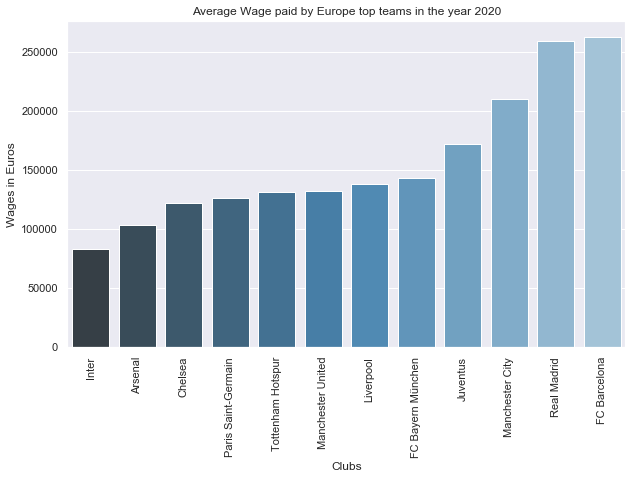

In [91]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.barplot(x="club", y="wages_euro",data=stats_20, dodge=False,palette="Blues_d")
plt.xticks(rotation = 90)
plt.xlabel('Clubs')
plt.ylabel('Wages in Euros')
plt.title('Average Wage paid by Europe top teams in the year 2020');

# Insights

> **We can say that Spanish giants Real Madrid and Fc Barcelona are Smashing their Fincial kit to keep their best prospects.**

> **While Inter is the least team with minimum average wages.**

# How deos the Clubs perform when taking average age into account.

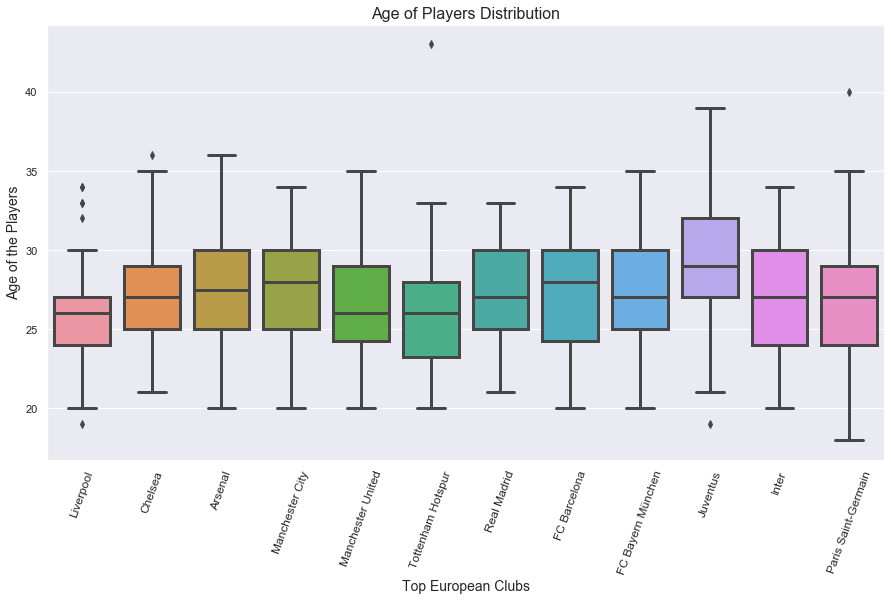

In [92]:
# Plottin the Box Plot.
plt.figure(figsize=(15,8))
base_color = sns.color_palette()[0]
sns.boxplot(data = players_15, x = 'club', y = 'age',linewidth=3.0)
plt.xticks(rotation = 70,fontsize = 12)
plt.xlabel('Top European Clubs',fontsize = 14)
plt.ylabel('Age of the Players',fontsize = 14)
plt.title('Age of Players Distribution',fontsize = 16);

##### Insights.

> **We can see that Juventus players average age is higher than all other teams average age.**

> **While Liverpool hosts most young players in the top flight competitions**

# We will now look into EPL giants Stats.(Manchester City & Liverpool)

In [93]:
# Creating new datasets for analysis.

city_stats = stats_eur[stats_eur["club"]== "Manchester City"]
liverpool_stats = stats_eur[stats_eur["club"]== "Liverpool"]

In [94]:
# Creating new datasets for analysis.
city_liv = stats_eur[(stats_eur.club == 'Manchester City') | (stats_eur.club == 'Liverpool')]

# Do Managers have their Impact on the Team buildings/Development.?

> **I always wondered do managers have impact on the perfromance of the team.Special note to Top Class managers Like,**

> - Pep Guardiola - "Manchester City"
> - Jurgen Klopp - "Liverpool"
> - Zinedine Zidane - "Real Madrid"

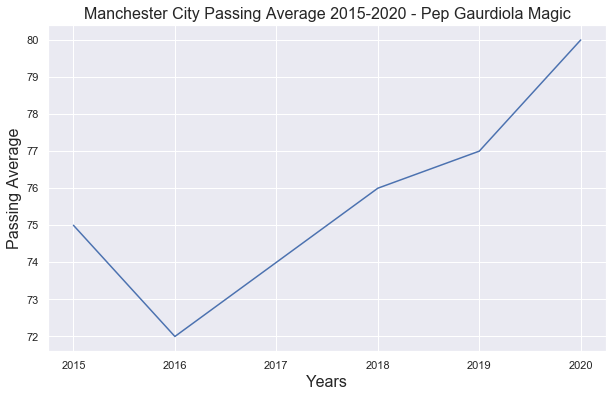

In [95]:
#plotting the line plot.
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Year", y="passing",data=city_stats)
plt.xlabel('Years',fontsize = 16)
plt.ylabel('Passing Average',fontsize = 16)
plt.title('Manchester City Passing Average 2015-2020 - Pep Gaurdiola Magic',fontsize = 16);

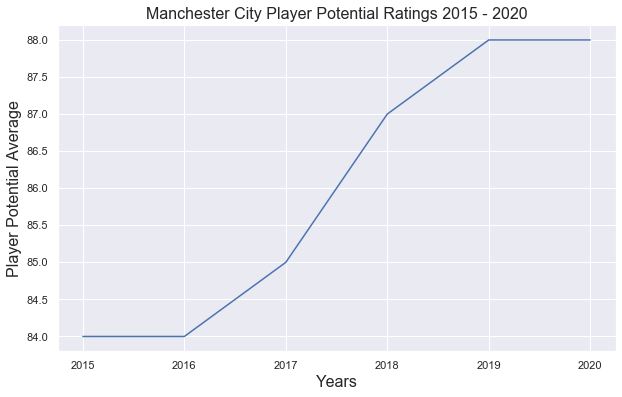

In [96]:
#plotting the line plot.
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Year", y="potential",data=city_stats)
plt.xlabel('Years',fontsize = 16)
plt.ylabel('Player Potential Average',fontsize = 16)
plt.title('Manchester City Player Potential Ratings 2015 - 2020',fontsize = 16);

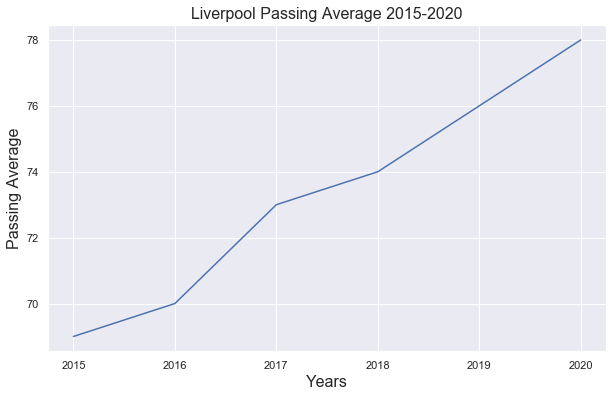

In [97]:
#plotting the line plot.

plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Year", y="passing",data=liverpool_stats)
plt.xlabel('Years',fontsize = 16)
plt.ylabel('Passing Average',fontsize = 16)
plt.title('Liverpool Passing Average 2015-2020',fontsize = 16);

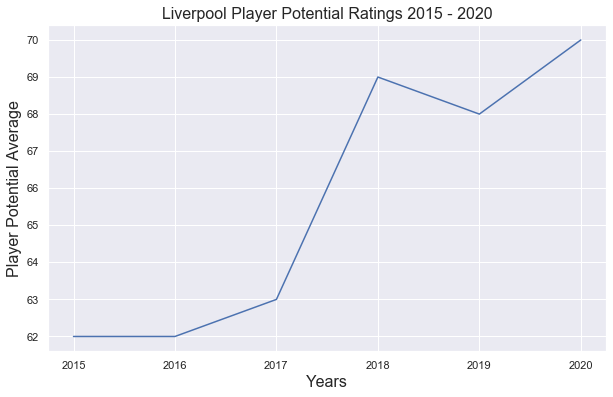

In [98]:
#plotting the line plot.

plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Year", y="attacking",data=liverpool_stats)
plt.xlabel('Years',fontsize = 16)
plt.ylabel('Player Potential Average',fontsize = 16)
plt.title('Liverpool Player Potential Ratings 2015 - 2020',fontsize = 16);

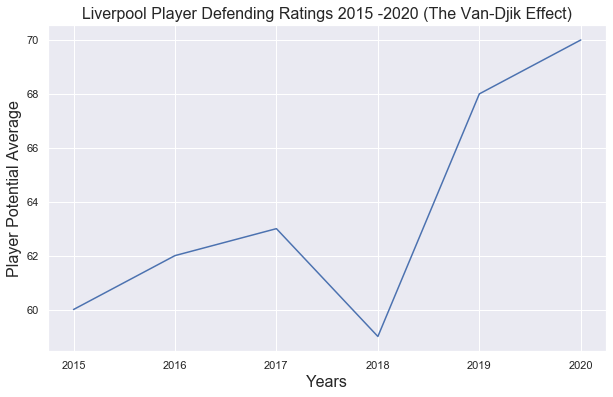

In [99]:
#plotting the line plot.

plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Year", y="defending",data=liverpool_stats)
plt.xlabel('Years',fontsize = 16)
plt.ylabel('Player Potential Average',fontsize = 16)
plt.title('Liverpool Player Defending Ratings 2015 -2020 (The Van-Djik Effect)',fontsize = 16);

# Insights

> - **Yes it is true that Talented managers of the teams have real impact in the team performance.** 

> - **From the Above Graphs it is clear that pep guardiola had improved the teams passing performance. as it is cleraly evident that after his appointment in 2016 the line plot spikes from 72 - 80.**

> - **Speaking about Player potential same result is evident that the player potential ratings has been spiked from 84 - 88 by buying correct players in the transfer market.**

> - **so what about liverpool,same was evident when the team management bought jurgen Klopp who revelotunised the team to a next level where the team won  2019 Champions league.**

> - **I am amazed to see that the there is huge spike from 60 -70 in the defending capablities of the team when the team signed the tank Virgil-van-dijk. It is clear the team boosted the defendending flaws which helped them to win the champions league and rule the europe football.**

# Performance Analysis of Real Madrid (An Overview)

In [100]:
# transforming the data for analysis.

la_liga_giants['overall'] = la_liga_giants['overall'].astype("int")
la_liga_giants['potential'] = la_liga_giants['potential'].astype("int")
la_liga_giants['passing'] = la_liga_giants['passing'].astype("int")
la_liga_giants['defending'] = la_liga_giants['defending'].astype("int")
la_liga_giants['attacking'] = la_liga_giants['attacking'].astype("int")
la_liga_giants['pace'] = la_liga_giants['pace'].astype("int")
la_liga_giants['wages_euro'] = la_liga_giants['wages_euro'].astype("int")
la_liga_giants['age_avg'] = la_liga_giants['age_avg'].astype("int")

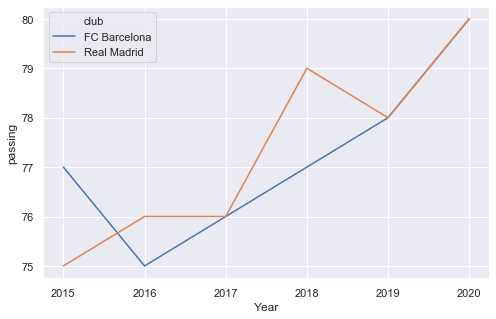

In [101]:
#plotting the line plot.

plt.figure(figsize=(8,5))
ax = sns.lineplot(x="Year", y="passing", hue="club",data=la_liga_giants,err_style="bars", ci=68);

In [102]:
madrid_stats = stats_eur[stats_eur["club"]== "Real Madrid"]

# What made Real Madrid to sign Zinedine Zidane Again in 2019.

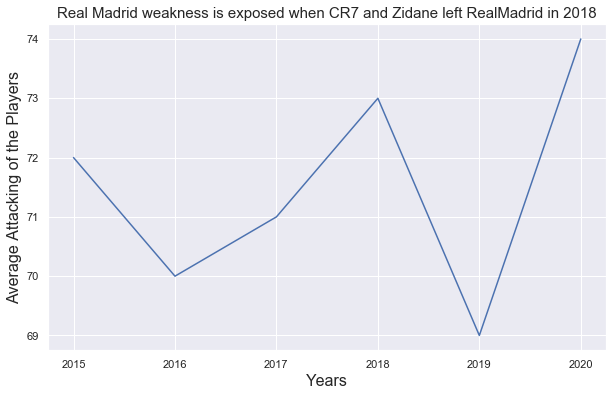

In [103]:
#plotting the line plot.

plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Year", y="attacking",data=madrid_stats)
plt.xlabel('Years',fontsize = 16)
plt.ylabel('Average Attacking of the Players',fontsize = 16)
plt.title('Real Madrid weakness is exposed when CR7 and Zidane left RealMadrid in 2018',fontsize = 15);

# Insights

>- **As zidane and ronaldo left madrid in 2018 there was new manager appointement to replace the outgoing manager zidane. but it is proved wrong by the above plot as we can see that there is huge drop in the attackng capablity as the new manager is no capable to replace the talented player Cristiano Ronaldo and their attack lost the pace and improper decision to bench star player bale also made the attaacking drop down in 2018-2019 season where real madrid finish 3rd followed by their glittering season under Zidane.**

>- **This has made the management to reappoint zidane and again from 2019 they had improved the performance under their talented manager as we can see the spike in the perfromance.**

# Modelling

> **Now I am Curious to know does the release clause of the player has any impact on the value of the player.**

> **So i have decide to build a simple linear regression model with release_clause_eur and value_eur as dependent and independent variable**.

> **And we will evaluate the model.**

In [104]:
#Check the data.
df_20.head(1)

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Year
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Lean,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,2020


In [105]:
#Choosing the variables that could be essential for modelling.

model_df = df_20[['age','overall','potential','value_eur','wage_eur','release_clause_eur']]

In [106]:
#chekcing the missing values.
columns_with_null(model_df)

,# of Nulls,Null %
release_clause_eur,1298,0.071014


In [107]:
# Dropping the missing values.
model_df = model_df.dropna()

In [108]:
#chekcing the missing values.
columns_with_null(model_df)

,# of Nulls,Null %


In [109]:
# Checking the datatypes
model_df.dtypes

age                     int64
overall                 int64
potential               int64
value_eur               int64
wage_eur                int64
release_clause_eur    float64
dtype: object

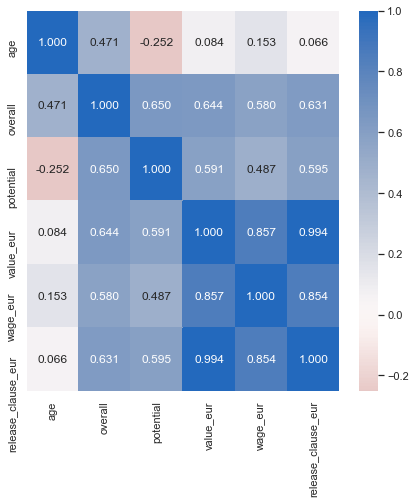

In [110]:
#we will tyr to find some correlation between the variabls.

plt.figure(figsize = [7, 7])
sns.heatmap(model_df.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

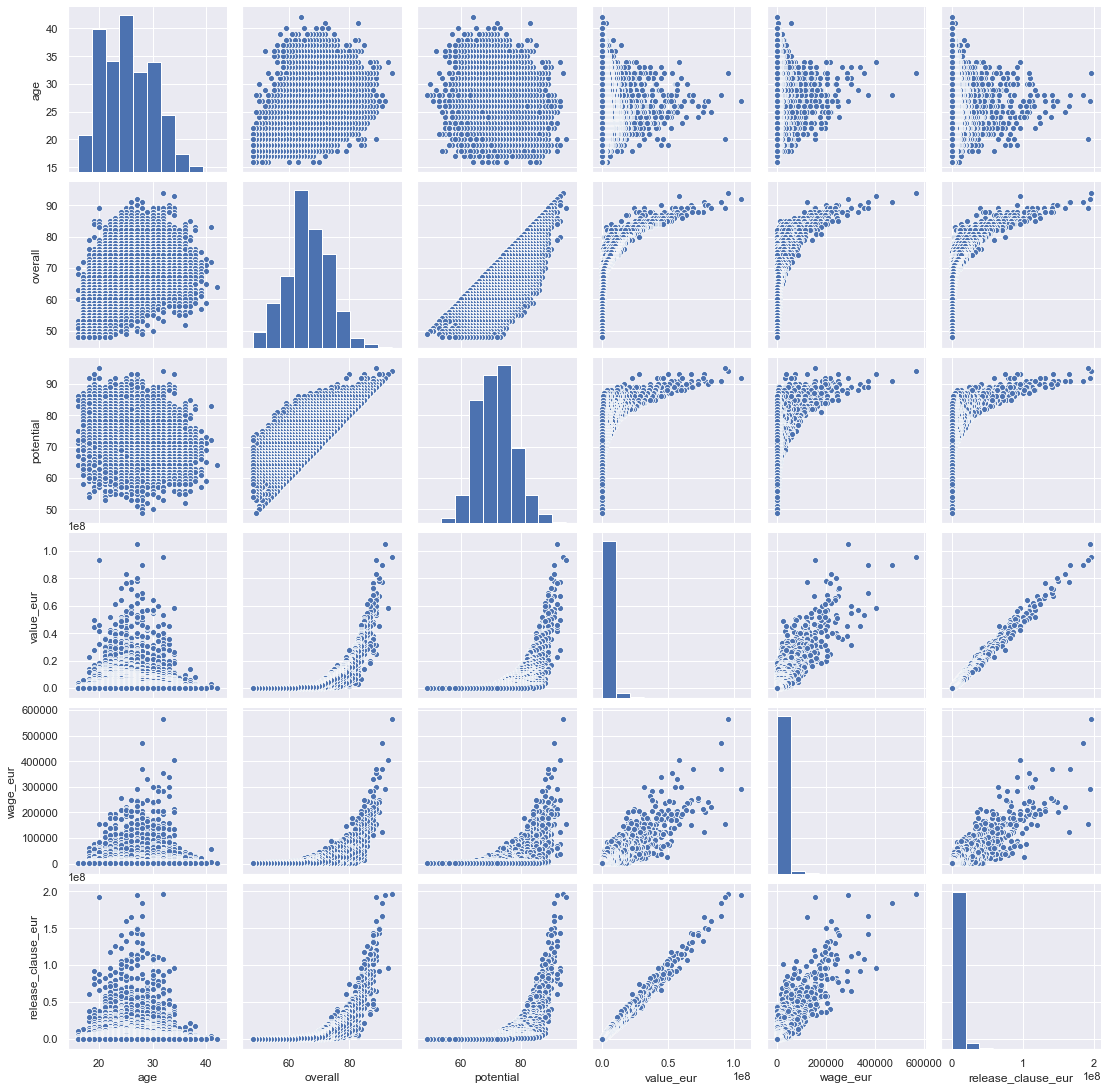

In [111]:
#we will tyr to find some correlation between the variables.
sns.pairplot(model_df);

In [112]:
model_data = model_df[['release_clause_eur','value_eur']]

In [113]:
def fit_linear_mod(df):
    
    # define our input variable (X) & output variable.
    Y = model_data.drop('release_clause_eur', axis = 1)
    X = model_data[['release_clause_eur']]

    # Split X and y into X_
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
    
    
    # create a Linear Regression model object.
    regression_model = LinearRegression(normalize = True)

    # pass through the X_train & y_train data set.
    regression_model.fit(X_train, y_train)
    
    # let's grab the coefficient of our model and the intercept.
    intercept = regression_model.intercept_[0]
    coefficient = regression_model.coef_[0][0]
    
    
    # Get predictions.
    y_predict = regression_model.predict(X_test)
    
    #Score the model
    model_r2 = r2_score(y_test, y_predict)
    
    
    # Plot outputs
    plt.scatter(X_test, y_test,  color='gainsboro', label = 'Value_eur')
    plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

    plt.title("Linear Regression release_clause_eur Vs. Value_eur")
    plt.xlabel("release_clause_eur")
    plt.ylabel("Value_eur")
    plt.legend()
    plt.show()

    # The coefficients
    print('value_eur coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))
    
    
    
    return("R2: {:.2}".format(model_r2))  

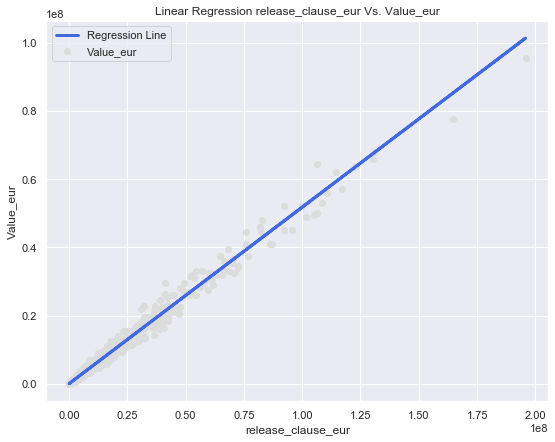

value_eur coefficient:0.52


'R2: 0.99'

In [123]:
# testing the model.
fit_linear_mod(model_df)